In [77]:
import glob
import os
from scipy import io as sio
import numpy as np
from PIL import Image
import cv2

In [35]:
from matplotlib import pyplot as plt

In [1]:
train_root_dir = '/home/hanshan/Data/DataCV/tmp/trainSet'
test_root_dir = '/home/hanshan/Data/DataCV/tmp/testSet'

In [3]:
root_dir = train_root_dir

In [6]:
ori_img = os.path.join(root_dir, 'Stimuli')

In [10]:
cate = [item for item in os.listdir(ori_img) if not item.startswith('.')]
cate

['Action',
 'Affective',
 'Art',
 'BlackWhite',
 'Cartoon',
 'Fractal',
 'Indoor',
 'Inverted',
 'Jumbled',
 'LineDrawing',
 'LowResolution',
 'Noisy',
 'Object',
 'OutdoorManMade',
 'OutdoorNatural',
 'Pattern',
 'Random',
 'Satelite',
 'Sketch',
 'Social']

In [185]:
def convert_mat2png(mt_dir, png_dir):
    tmp_mt = sio.loadmat(mt_dir)
    tmp_fix = tmp_mt['fixLocs']
    tmp_fix = np.array(tmp_fix).astype(np.uint8)
    # tmp_fix = tmp_fix[0]
    img = Image.fromarray(tmp_fix).convert('L')
    img.save(png_dir)
    

In [186]:
fix_mat_dir = '/home/hanshan/Data/DataCV/tmp/trainSet/fixation_mat'
fix_dir = '/home/hanshan/Data/DataCV/tmp/trainSet/fixation'

In [187]:
if not os.path.exists(fix_dir): os.makedirs(fix_dir)

In [188]:
cnt = 0
for tmp_cate in cate:
    tmp_mt_dir = os.path.join(fix_mat_dir, tmp_cate)
    tmp_png_dir = os.path.join(fix_dir, tmp_cate)
    mt_fixs = os.listdir(tmp_mt_dir)
    
    if not os.path.exists(tmp_png_dir):
        os.makedirs(tmp_png_dir)
    
    print(f'{tmp_cate} has {len(mt_fixs)}')
    cnt += len(mt_fixs)
    
    for mt_fix in mt_fixs:
        cur_dir = os.path.join(tmp_mt_dir, mt_fix)
        # print(cur_dir)
        dst_dir = os.path.join(fix_dir, tmp_cate, mt_fix.replace('.mat', '.png'))
        convert_mat2png(cur_dir, dst_dir)
        # print(dst_dir)
        # break
    # break

Action has 100
Affective has 100
Art has 100
BlackWhite has 100
Cartoon has 100
Fractal has 100
Indoor has 100
Inverted has 100
Jumbled has 100
LineDrawing has 100
LowResolution has 100
Noisy has 100
Object has 100
OutdoorManMade has 100
OutdoorNatural has 100
Pattern has 100
Random has 100
Satelite has 100
Sketch has 100
Social has 100


In [189]:
cnt

2000

### test mat 文件

In [140]:
tmp_dir = '/home/hanshan/Data/DataCV/tmp/trainSet/fixation_mat/Action/001.mat'

In [141]:
tmp_mt = sio.loadmat(tmp_dir)
tmp_fix = tmp_mt['fixLocs']
tmp_fix = np.array(tmp_fix).astype(np.uint8)

In [142]:
tmp_fix.shape

(1080, 1920)

In [143]:
np.sum(tmp_fix == 1)

304

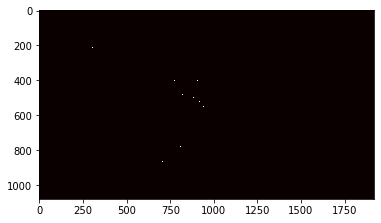

In [144]:
plt.imshow(tmp_fix, cmap='hot')

In [172]:
tmp_dir = '/home/hanshan/Data/DataCV/tmp/trainSet/fixation/Action/011.png'

In [173]:
img = Image.open(tmp_dir)

In [174]:
img = cv2.imread(tmp_dir, cv2.IMREAD_GRAYSCALE)

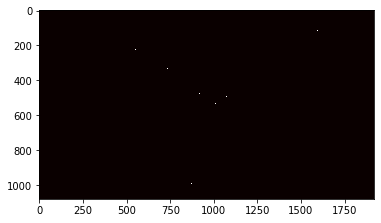

In [175]:
plt.imshow(img, cmap='hot')